In [1]:
import time
import math
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataframe = pd.read_csv('../data/metric_date.csv')
dataframe = dataframe.iloc[:,0:4]
indexNames = dataframe[ dataframe['metric_id'] == dataframe.iloc[0,0] ].index
dataframe = dataframe.iloc[indexNames].sort_values(by='timestamp', ascending=True).loc[:,['timestamp', 'value']]
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])
dataframe.head()

,timestamp,value
1699,2019-11-25 01:00:18,3.750
1698,2019-11-25 01:05:18,14.625
1697,2019-11-25 01:10:18,15.125
1696,2019-11-25 01:15:18,17.125
1695,2019-11-25 01:20:18,16.250


In [3]:
training_limite = int(0.66*dataframe.shape[0])
training = dataframe.iloc[:training_limite]
validating = dataframe.iloc[training_limite:]

# Split the outcome values from the input dataset
x_train = training['timestamp'].to_numpy().reshape(-1, 1)
y_train = training['value']
x_valid = validating['timestamp'].to_numpy().reshape(-1, 1)
y_valid = validating['value']

In [4]:
dtree = DecisionTreeRegressor(min_samples_leaf=0.02, random_state=3)
dtree.fit(x_train, y_train)

pred_train= dtree.predict(x_train)
pred_valid= dtree.predict(x_valid)

<function matplotlib.pyplot.show(close=None, block=None)>

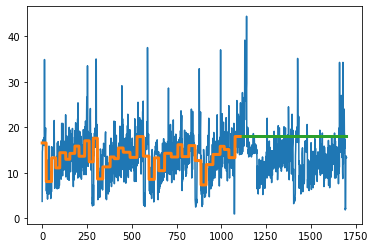

In [5]:
# indx = keys_id[i]
fig, ax = plt.subplots()
# shift train predictions for plotting
trainPlot = np.empty_like(dataframe['value'].to_numpy().reshape(-1,1))
trainPlot[:, :] = np.nan
trainPlot[:len(x_train), :] = pred_train.reshape(-1,1)
# shift test predictions for plotting
validPlot = np.empty_like(dataframe['value'].to_numpy().reshape(-1,1))
validPlot[:, :] = np.nan
validPlot[len(x_train):len(dataframe['value'].to_numpy()), :] = pred_valid.reshape(-1,1)
# plot baseline and predictions
# ax.set_xlabel(str(i))
ax.plot(dataframe['value'].to_numpy().reshape(-1,1))
ax.plot(trainPlot, linewidth=3)
ax.plot(validPlot, linewidth=3)
plt.show